In [14]:
# recieve 1 at rightmost state and recieve small reward at leftmost state
def test(episode_length, test_length):
    
    from chain_mdp import ChainMDP
    from agent_chainMDP import agent
    
    env = ChainMDP(10)
    s = env.reset()

    """ Your agent"""
    sa_list = []
    for i in range(env.n):
        for j in [0,1]:
            sa_list.append((i, j))
    agent_params = {'gamma'            : 0.9,
                    'kappa'            : 1.0,
                    'mu0'              : 0.0,
                    'lamda'            : 4.0,
                    'alpha'            : 3.0,
                    'beta'             : 3.0,
                    'max_iter'         : 100,
                    'sa_list'          : sa_list}
    agent = agent(agent_params)

    # always move right left: 0, right: 1
    # action = 1
    for episode in range(episode_length):
        s = env.reset()
        done = False
        while not done:
            a = agent.take_action(s, 0)
            # Step environment
            s_, r, done, t = env.step(a)
            agent.observe([t, s, a, r, s_])
            agent.update_after_step(10, True)
            # Update current state
            s = s_

    total_reward = 0
    for episode in range(test_length):
        cum_reward = 0.0
        done = False
        s = env.reset()
        while not done: 
            action = agent.take_action(s, 0)
            s_, r, done, t = env.step(action)
            #print(s_, r, t)
            cum_reward += r
            s = s_
        total_reward += cum_reward
        
        
    return total_reward/test_length

In [ ]:
import matplotlib.pyplot as plt

list = [i for i in range(0, 1000, 10)]
average_reward = []
for i in list:
    average_reward.append(test(i, 1000))


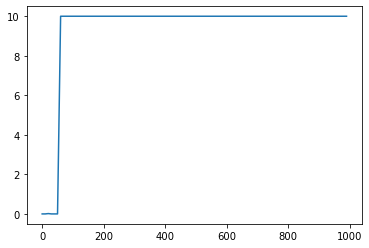

In [21]:
import matplotlib.pyplot as plt

plt.plot(list, average_reward)

c:\Users\compbio\Desktop\RL\agent_chainMDP.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pi = np.zeros(num_s, dtype=np.int)


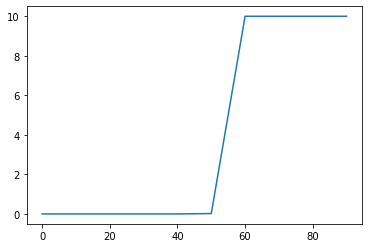

In [22]:
list = [i for i in range(0, 100, 10)]
average_reward = []
for i in list:
    average_reward.append(test(i, 1000))

plt.plot(list, average_reward)